## Final Project Submission

Please fill out:
* Student name: **Chelsea Power**
* Student pace: **part time**
* Scheduled project review date/time: **March 7, 2019 at 11 am ET**
* Instructor name: **Joe San Pietro**
* Blog post URL: https://chelseapower.github.io/using_histograms_to_problem_solve


### Variable Definitions

* **id** - Unique ID for each home sold 
* **date** - Date of the home sale 
* **price** - Price of each home sold 
* **bedrooms** - Number of bedrooms 
* **bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
* **sqft_living** - Square footage of the apartments interior living space 
* **sqft_lot** - Square footage of the land space 
* **floors** - Number of floors 
* **waterfront** - For whether the apartment was overlooking the waterfront or not 1’s represent a waterfront property, 0’s represent a non-waterfront property 
* **view** - An index from 0 to 4 of how good the view of the property was, 0 - lowest, 4 - highest 
* **condition** - An index from 1 to 5 on the condition of the apartment, 1 - lowest, 4 - highest 
* **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of * construction and design, and 11-13 have a high quality level of construction and design. 
* **sqft_above** - The square footage of the interior housing space that is above ground level 
* **sqft_basement** - The square footage of the interior housing space that is below ground level 
* **yr_built** - The year the house was initially built 
* **yr_renovated** - The year of the house’s last renovation 
* **zipcode** - What zipcode area the house is in 
* **lat** - Lattitude 
* **long** - Longitude 
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors 
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Phase 1: Understanding the Dataset

* Import the housing sale prices in King County, USA between the time period May 2014 - May 2015. 

In [0]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [0]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (6).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

#Look at size of the dataset
df.shape

(21597, 21)

In [0]:
#Show first ten rows in DataFrame
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


![King County, WA](http://drive.google.com/uc?export=view&id=1WQe2FwGTs7oiFJ52EUSNOFPQGZiaUSkP)

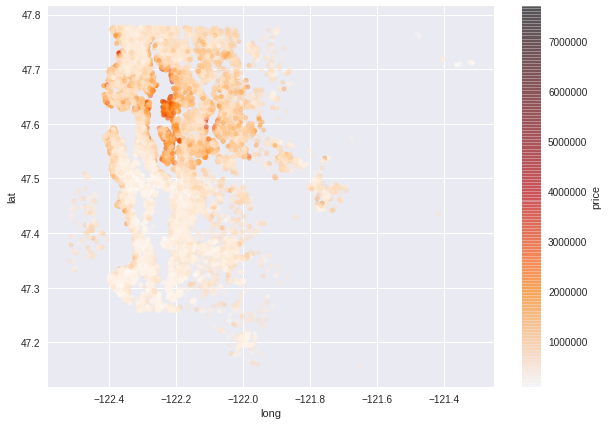

In [0]:
#Show the most expensive to lease expensive areas by color
df.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7),
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

## Phase 2: Scrubbing (Data Preparation)

* Detecting and deal with missing values
* Data type conversions (e.g. numeric data mistakenly encoded as objects/strings)
* Checking for and removing multicollinearity (correlated predictors)

In [0]:
# Checking the column types and entries per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [0]:
# Show total missing values by column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

* Replace null values for `waterfront`, `view` and `yr_renovated`

In [0]:
# Show unique values for waterfront column
df['waterfront'].unique()

array([nan,  0.,  1.])

In [0]:
# Replace null values with 0 rather than removing 2376 rows
# Waterfront is a category variable where 0 = no view and 1 = view
df['waterfront'].fillna(0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [0]:
# Show unique values for view column
df["view"].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [0]:
# Replace 63 null values with 0 to be equilivant to no view to onvert variable from a float to an int
# View is a categorical value
df['view'].fillna(0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [0]:
# Show unique values for yr_renovated column
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [0]:
# Replace null values with 0 so I can convert yr_renovated from a float to an int
df['yr_renovated'].fillna(0, inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

### Change types of the variables 

* Change objects to appropiate formats (Integers and Categories)
* Make categorical variables

In [0]:
# Convert from float to int64
df['price'] = df['price'].astype('int64')
df['floors'] = df['floors'].astype('int64')
df['bathrooms'] = df['bathrooms'].astype('int64')

# Convert from object to int64
df['yr_renovated'] = df['yr_renovated'].astype('int64')

# Make categorical variables
df["waterfront"] = df["waterfront"].astype('category')
df["condition"] = df["condition"].astype('category')
df["view"] = df["view"].astype('category')
df["grade"] = df["grade"].astype('category')

# Convert sqft_basement from object to float
df['sqft_basement'] = pd.to_numeric(df["sqft_basement"], errors = 'coerce').fillna(0, downcast='infer')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null int64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null int64
waterfront       21597 non-null category
view             21597 non-null category
condition        21597 non-null category
grade            21597 non-null category
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(4), float64(2), int64(14), object(1)
memory usage: 2.9+ MB


In [0]:
from google.colab import files
uploaded = files.upload()

Saving zip_codes.xlsx to zip_codes (4).xlsx


In [0]:
#Look at zip codes by city
import io
df_zip = pd.read_excel(io.BytesIO(uploaded['zip_codes.xlsx']))

#Look at size of the dataset
df_zip.head()

,Unnamed: 0,Unnamed: 1
0,zipcode,city
1,98001,Auburn
2,98002,Auburn
3,98003,Federal_Way
4,98004,Bellevue


In [0]:
df_zip = df_zip.drop([0])

In [0]:
df_zip.columns = ['zipcode','city']
df_zip.head()

,zipcode,city
1,98001,Auburn
2,98002,Auburn
3,98003,Federal_Way
4,98004,Bellevue
5,98005,Bellevue


In [0]:
df = pd.merge(df,df_zip,how='left', on='zipcode')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,10/13/2014,221900,3,1,1180,5650,1,0.0,0.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,12/9/2014,538000,3,2,2570,7242,2,0.0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2/25/2015,180000,2,1,770,10000,1,0.0,0.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,12/9/2014,604000,4,3,1960,5000,1,0.0,0.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2/18/2015,510000,3,2,1680,8080,1,0.0,0.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish


In [0]:
#Find duplicates and adds up all True values
df.duplicated(keep=False).sum()

0

## Summary

* All columns have missing values removed and have been set to the correct type
* Will not be considering the means and std values for categorical (`waterfront`, `view`, `condition` and `grade`) and datetime (`date`) variables
* Will not be considering the means and std values for `id`, `zipcode`, `lat`, `long`, `yr_renovated` columns
* Create heatmap to identify most important features and explore the intercorrelation between features

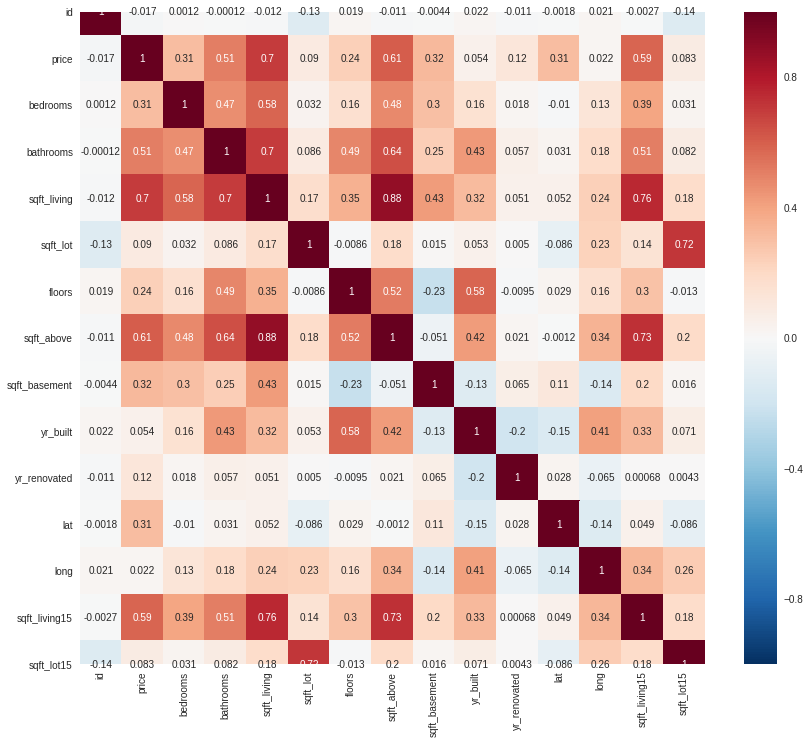

In [0]:
#Create coorelation heatmap
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

## Heatmap Summary

* Multicolinarity is high for: `sqft_living`
* Create new dataframe `df_pred` and drop unnecessary columms: `ID`, `long`, `lat`, `date`, `zipcode`, `yr_renovated`, and `sqft_living`.

In [0]:
# Remove ID, long, lat, date, waterfront, zipcode, yr_renovated, sqft_basement, and sqft_living
df_pred = df.drop(['id','long','lat','date','zipcode','yr_renovated','sqft_basement','sqft_living'], axis=1, inplace=False)

In [0]:
df_pred.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,city
0,221900,3,1,5650,1,0.0,0.0,3,7,1180,1955,1340,5650,Seattle
1,538000,3,2,7242,2,0.0,0.0,3,7,2170,1951,1690,7639,Seattle
2,180000,2,1,10000,1,0.0,0.0,3,6,770,1933,2720,8062,Kenmore
3,604000,4,3,5000,1,0.0,0.0,5,7,1050,1965,1360,5000,Seattle
4,510000,3,2,8080,1,0.0,0.0,3,8,1680,1987,1800,7503,Sammamish


In [0]:
df_pred.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,1.750660,1.509941e+04,1.445988,1788.596842,1970.999676,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.734042,4.141264e+04,0.551658,827.759761,29.375234,685.230472,27274.441950
min,7.800000e+04,1.000000,0.000000,5.200000e+02,1.000000,370.000000,1900.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.000000,5.040000e+03,1.000000,1190.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,7.618000e+03,1.000000,1560.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,1.068500e+04,2.000000,2210.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.000000,9410.000000,2015.000000,6210.000000,871200.000000


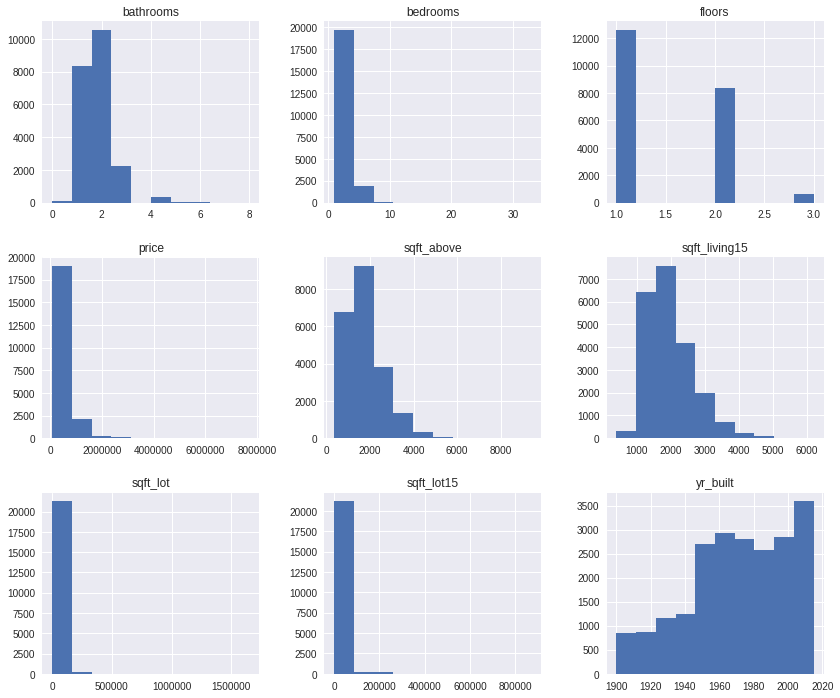

In [0]:
# Look at histograms for all columns
df_pred.hist(figsize = [14, 12]);

### Summary

* There are some obvious outliers in `price`, `bedrooms`, `bathrooms`, `sqft_above`,`sqft_basement`, `sqft_basement`,`sqft_living15`, `sqft_lot`, and `sqft_lot15` columns.
* Drop rows `price` to only include $600,000 or less
* Drop rows `bedrooms` to only include bedrooms 5 or less
* Drop rows `bathrooms` to only include bedrooms between 0 and 4
* Drop rows `sqft_above` to only include less than 4,000
* Drop rows `sqft_basement` to only include less than 1,000
* Drop rows `sqft_living15` to only include less than 4,000
* Drop rows `sqft_lot` to only include less than 30,000
* Drop rows `sqft_lot15` to only include less than 50,000

* After dropping rows, view the histogram again.

In [0]:
# Drop price above 600,000
df_pred.drop(df_pred[ df_pred['price'] > 600000 ].index, inplace=True)

# Drop bedrooms 5 or more
df_pred.drop(df_pred[ df_pred['bedrooms'] > 5 ].index, inplace=True)

# Drop bathrooms less than 0 and more than 4
df_pred.drop(df_pred[ (df_pred['bathrooms'] <= 0) & (df_pred['bathrooms'] >= 4) ].index, inplace=True)

# Drop sqft_above above 4,000
df_pred.drop(df_pred[ df_pred['sqft_above'] > 4000 ].index, inplace=True)

# Drop sqft_living15 above 4,000
df_pred.drop(df_pred[ df_pred['sqft_living15'] > 4000 ].index, inplace=True)

# Drop sqft_lot above 30,000
df_pred.drop(df_pred[ df_pred['sqft_lot'] > 30000 ].index, inplace=True)

# Drop sqft_lot15 above 500,000
df_pred.drop(df_pred[ df_pred['sqft_lot15'] > 500000 ].index, inplace=True)

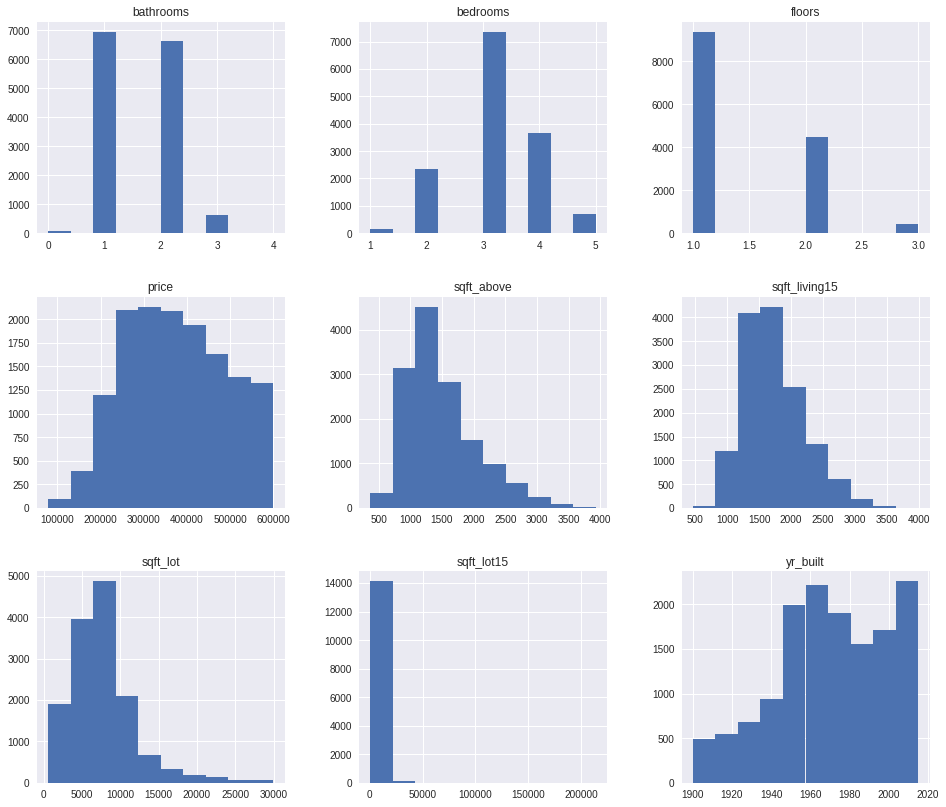

In [0]:
# Show histogram again with dropped outliners
df_pred.hist(figsize = [16, 14]);

In [0]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14286 entries, 0 to 21596
Data columns (total 14 columns):
price            14286 non-null int64
bedrooms         14286 non-null int64
bathrooms        14286 non-null int64
sqft_lot         14286 non-null int64
floors           14286 non-null int64
waterfront       14286 non-null category
view             14286 non-null category
condition        14286 non-null category
grade            14286 non-null category
sqft_above       14286 non-null int64
yr_built         14286 non-null int64
sqft_living15    14286 non-null int64
sqft_lot15       14286 non-null int64
city             14286 non-null object
dtypes: category(4), int64(9), object(1)
memory usage: 1.3+ MB


In [0]:
# Create more categorical features
df["floors"] = df["floors"].astype('category')
df["bathrooms"] = df["bathrooms"].astype('category')
df["bedrooms"] = df["bedrooms"].astype('category')

## Phase 3: Exploring

* Log transform variables in new DataFrame `df_log`
* Cannot log transform `sqft_basement` since there are 303 rows of 0's in this column
* Cannot log transform `yr_renovated` since there are 70 rows of 0's in this column
* Both of these variables are candiadates to dropped and/or become category variables

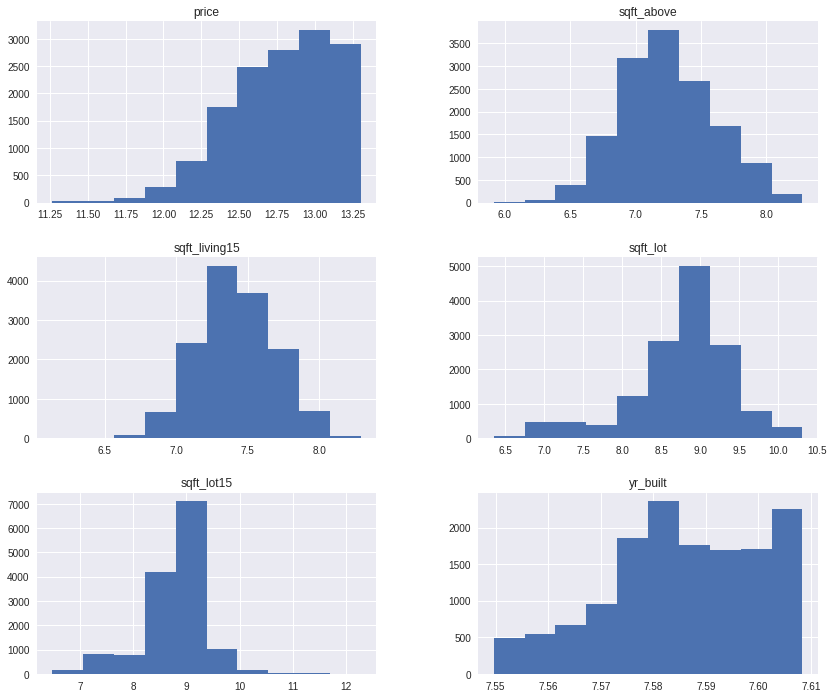

In [0]:
# Log transform variables
df_log = pd.DataFrame([])
df_log["price"] = np.log(df_pred["price"])
df_log["sqft_above"] = np.log(df_pred["sqft_above"])
df_log["sqft_living15"] = np.log(df_pred["sqft_living15"])
df_log["sqft_lot"] = np.log(df_pred["sqft_lot"])
df_log["sqft_lot15"] = np.log(df_pred["sqft_lot15"])
df_log["yr_built"] = np.log(df_pred["yr_built"])
df_log.hist(figsize  = [14, 12]);

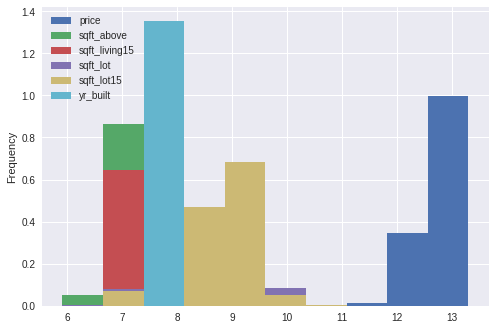

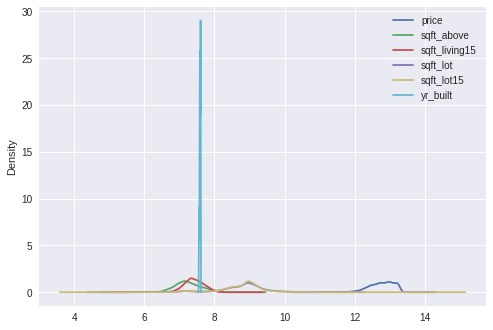

In [0]:
#Visualize the features as a KDE
df_log.plot.hist(density=True )
df_log.plot.kde(label='price')
plt.legend()
plt.show()

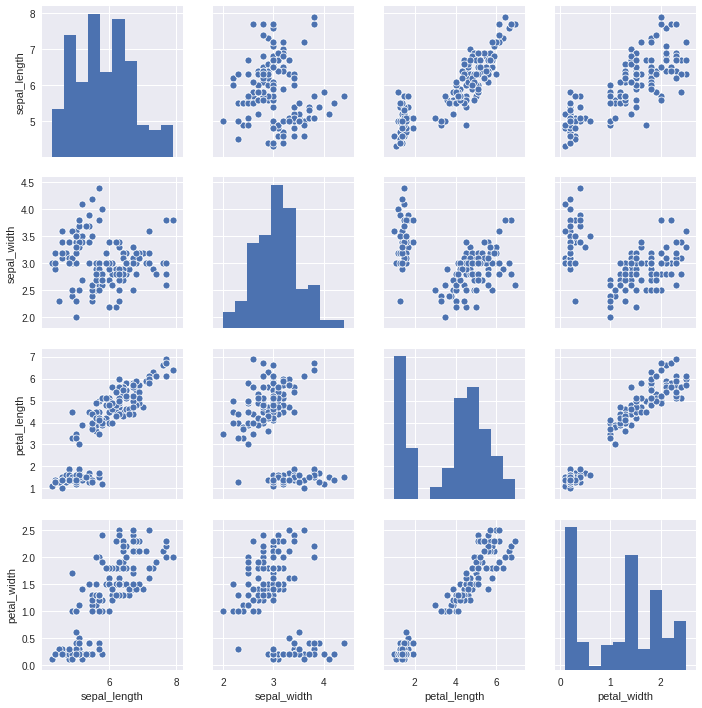

In [0]:
#Plot multiple pairwise bivariate distributions in a dataset
iris = sns.load_dataset("iris")
sns.pairplot(iris);

## Project Questions

1.   What are the top features that attribute to the housing price?
2.   How does location impact housing?
3.   What factors have little to no influence on the price of a house in this area?


## Phase 4: Modeling

* Create OLS Model get R-squared & P-values
* Compare continuous features to categorical
* Conduct recrussive feature elimination
* Train/Test Split
* 10-fold cross validation

In [0]:
# Ordinary Least Squares
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Runs OLS regression between (continuous) independent and dependent variables
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Housing: Price~id
------------------------------
['id', 0.00028129487235262207, 550107.1128004465, -2.1418173487098236e-06, 0.013708683016832951]
Housing: Price~sqft_living
------------------------------
['sqft_living', 0.49268789904035093, -43988.892194227185, 280.8630143588747, 0.0]
Housing: Price~sqft_lot
------------------------------
['sqft_lot', 0.008077735099594086, 528258.0465134738, 0.7972846608151648, 5.571622021766378e-40]
Housing: Price~sqft_above
------------------------------
['sqft_above', 0.3664703472658384, 59757.11100593545, 268.6684059672897, 0.0]
Housing: Price~sqft_basement
------------------------------
['sqft_basement', 0.10311007135689365, 463664.13032957475, 268.2113964335472, 0.0]
Housing: Price~yr_built
------------------------------
['yr_built', 0.00291096219200615, -789621.8059390165, 674.7430736386136, 2.117581295227859e-15]
Housing: Price~yr_renovated
------------------------------
['yr_renovated', 0.013889854717611616, 532118.9189094183, 118.933505309726

In [0]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,id,0.000281295,550107,-2.14182e-06,0.0137087
2,sqft_living,0.492688,-43988.9,280.863,0
3,sqft_lot,0.00807774,528258,0.797285,5.57162e-40
4,sqft_above,0.36647,59757.1,268.668,0
5,sqft_basement,0.10311,463664,268.211,0
6,yr_built,0.00291096,-789622,674.743,2.11758e-15
7,yr_renovated,0.0138899,532119,118.934,1.17975e-67
8,lat,0.0940602,-3.81351e+07,813191,0
9,long,0.000485599,7.57093e+06,57527.3,0.00120099


In [0]:
import statsmodels.formula.api as sm

formula = 'price~sqft_above+sqft_living15+yr_built+sqft_lot15+sqft_lot'
model=sm.ols(formula, data=df_log)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     928.7
Date:                Mon, 11 Nov 2019   Prob (F-statistic):               0.00
Time:                        04:54:09   Log-Likelihood:                -2838.3
No. Observations:               14286   AIC:                             5689.
Df Residuals:                   14280   BIC:                             5734.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.0432      1.587     32.801

### Results

The above shows us that the combination of variables are statistically significant (p<.05) and attribute to about 28% of price predictability / R-squared value.

### Build a model with each categorical variable as a predictor

* Create a new dataset with "One Hot Encoded" categories
* Run against log transformed and regular `price`
* Use the 4 categorical variables: `waterfront`, `view`, `condition`, and `grade`

In [0]:
# Create new data set with only price and the category variables
df_categories = df_pred.drop(['bathrooms','sqft_lot','floors','sqft_above',
                              'sqft_living15','sqft_lot15'], axis=1)

In [0]:
# One Hot Encode the category data set
one_hot_df = pd.get_dummies(df_categories)
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14286 entries, 0 to 21596
Data columns (total 49 columns):
price                 14286 non-null int64
bedrooms              14286 non-null int64
yr_built              14286 non-null int64
waterfront_0.0        14286 non-null uint8
waterfront_1.0        14286 non-null uint8
view_0.0              14286 non-null uint8
view_1.0              14286 non-null uint8
view_2.0              14286 non-null uint8
view_3.0              14286 non-null uint8
view_4.0              14286 non-null uint8
condition_1           14286 non-null uint8
condition_2           14286 non-null uint8
condition_3           14286 non-null uint8
condition_4           14286 non-null uint8
condition_5           14286 non-null uint8
grade_3               14286 non-null uint8
grade_4               14286 non-null uint8
grade_5               14286 non-null uint8
grade_6               14286 non-null uint8
grade_7               14286 non-null uint8
grade_8               14286 non

In [0]:
# Rename the columns / remove the ".0"
one_hot_df.columns = ['price','bedrooms','yr_built','waterfront0','waterfront1',
                      'view0','view1','view2','view3','view4','condition1',
                      'condition2','condition3','condition4','condition5',
                      'grade3','grade4','grade5','grade6','grade7','grade8',
                      'grade9','grade10','grade11','grade12','grade13','city_Auburn',
                      'city_Bellevue','city_Black_Diamond','city_Bothell',
                      'city_Carnation','city_Duvall','city_Enumclaw','city_Fall_City',
                      'city_Federal_Way','city_Issaquah','city_Kenmore','city_Kent',
                      'city_Kirkland','city_Maple_Valley','city_Mercer_Island',
                      'city_North_Bend','city_Redmond','city_Renton','city_Sammamish',
                      'city_Seattle','city_Snoqualmie','city_Vashon','city_Woodinville']
one_hot_df.head()

,price,bedrooms,yr_built,waterfront0,waterfront1,view0,view1,view2,view3,view4,condition1,condition2,condition3,condition4,condition5,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,grade13,city_Auburn,city_Bellevue,city_Black_Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall_City,city_Federal_Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple_Valley,city_Mercer_Island,city_North_Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,221900,3,1955,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000,3,1951,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,180000,2,1933,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,510000,3,1987,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,257500,3,1995,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
one_hot_df.shape

(14286, 49)

### Categorical Variable Model with regular price

In [0]:
# Using regular price
cols_bedrooms = one_hot_df.columns[1:2]
cols_yr_built = one_hot_df.columns[2:3]
cols_waterfront = one_hot_df.columns[3:5]
cols_view = one_hot_df.columns[5:10]
cols_condition = one_hot_df.columns[10:14]
cols_grade = one_hot_df.columns[14:26]
cols_city = one_hot_df.columns[25:50]

cols = [cols_bedrooms, cols_yr_built, cols_waterfront, 
        cols_view, cols_condition, cols_grade, cols_city]
for col in cols:
    sum_cols = "+".join(col)
    form = "price~" + sum_cols
    model = smf.ols(formula= form, data=one_hot_df).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     459.3
Date:                Mon, 11 Nov 2019   Prob (F-statistic):          2.52e-100
Time:                        05:19:56   Log-Likelihood:            -1.8671e+05
No. Observations:               14286   AIC:                         3.734e+05
Df Residuals:                   14284   BIC:                         3.734e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.935e+05   3914.876     74.972      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1826: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1365: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


### Results

* `Price` against `bedrooms` shows a low .31 (or 31%) r-squared value with a 0 p-value
* `Price` against `yr_built` shows a low .00 (or 0%) r-squared value with a 0 p-value
* `Price` against `waterfront` shows a low .00 (or 0%) r-squared value with a 0 p-value
* `Price` against `view` shows a low .01 (or 1%) r-squared value with a 0 p-value
* `Price` against `condition` shows a low .01 (or 1%) r-squared value with a 0 p-value
* `Price` against `grade` shows a high .20 (or 20%) r-squared value with a 0.2 p-value
* `Price` against `yr_renovated` shows a low .26 (or 26%) r-squared value with a 0 p-value

In [0]:
# Create new DataFrame with log transformed price and categorical variables
df_log_cat = pd.DataFrame([])
df_log_cat["price"] = np.log(df_pred["price"])
df_log_cat["bedrooms"] = df_pred["bedrooms"]
df_log_cat["yr_built"] = df_pred["yr_built"]
df_log_cat["waterfront"] = df_pred["waterfront"]
df_log_cat["view"] = df_pred["view"]
df_log_cat["condition"] = df_pred["condition"]
df_log_cat["grade"] = df_pred["grade"]
df_log_cat["city"] = df_pred["city"]

In [0]:
# One Hot Encode the new category data set
one_hot_df_log = pd.get_dummies(df_log_cat)
one_hot_df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14286 entries, 0 to 21596
Data columns (total 49 columns):
price                 14286 non-null float64
bedrooms              14286 non-null int64
yr_built              14286 non-null int64
waterfront_0.0        14286 non-null uint8
waterfront_1.0        14286 non-null uint8
view_0.0              14286 non-null uint8
view_1.0              14286 non-null uint8
view_2.0              14286 non-null uint8
view_3.0              14286 non-null uint8
view_4.0              14286 non-null uint8
condition_1           14286 non-null uint8
condition_2           14286 non-null uint8
condition_3           14286 non-null uint8
condition_4           14286 non-null uint8
condition_5           14286 non-null uint8
grade_3               14286 non-null uint8
grade_4               14286 non-null uint8
grade_5               14286 non-null uint8
grade_6               14286 non-null uint8
grade_7               14286 non-null uint8
grade_8               14286 n

In [0]:
# Rename the columns / remove the ".0"
one_hot_df_log.columns = ['price','bedrooms','yr_built','waterfront0','waterfront1',
                      'view0','view1','view2','view3','view4','condition1',
                      'condition2','condition3','condition4','condition5',
                      'grade3','grade4','grade5','grade6','grade7','grade8',
                      'grade9','grade10','grade11','grade12','grade13','city_Auburn',
                      'city_Bellevue','city_Black_Diamond','city_Bothell',
                      'city_Carnation','city_Duvall','city_Enumclaw','city_Fall_City',
                      'city_Federal_Way','city_Issaquah','city_Kenmore','city_Kent',
                      'city_Kirkland','city_Maple_Valley','city_Mercer_Island',
                      'city_North_Bend','city_Redmond','city_Renton','city_Sammamish',
                      'city_Seattle','city_Snoqualmie','city_Vashon','city_Woodinville']
one_hot_df_log.head()

,price,bedrooms,yr_built,waterfront0,waterfront1,view0,view1,view2,view3,view4,condition1,condition2,condition3,condition4,condition5,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,grade13,city_Auburn,city_Bellevue,city_Black_Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall_City,city_Federal_Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple_Valley,city_Mercer_Island,city_North_Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,12.309982,3,1955,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,13.195614,3,1951,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,12.100712,2,1933,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13.142166,3,1987,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,12.458775,3,1995,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Categorical Variable Model with log transformed price

In [0]:
# Using log transformed price
cols_bedrooms = one_hot_df.columns[1:2]
cols_yr_built = one_hot_df.columns[2:3]
cols_waterfront = one_hot_df.columns[3:5]
cols_view = one_hot_df.columns[5:10]
cols_condition = one_hot_df.columns[10:14]
cols_grade = one_hot_df.columns[14:26]
cols_city = one_hot_df.columns[25:50]

cols = [cols_bedrooms, cols_yr_built, cols_waterfront, cols_view, 
        cols_condition, cols_grade, cols_city]
for col in cols:
    sum_cols = "+".join(col)
    form = "price~" + sum_cols
    model = smf.ols(formula= form, data=one_hot_df_log).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     541.4
Date:                Mon, 11 Nov 2019   Prob (F-statistic):          1.40e-117
Time:                        05:27:50   Log-Likelihood:                -4583.6
No. Observations:               14286   AIC:                             9171.
Df Residuals:                   14284   BIC:                             9186.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5239      0.011   1100.657      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1826: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1365: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


### Results

* `Log transformed price` against `bedrooms` shows a low .03 (or 3%) r-squared value with a 0 p-value
* `Log transformed price` against `yr_built` shows a low .00 (or 0%) r-squared value with a 0 p-value
* `Log transformed price` against `waterfront` shows a low .00 (or 0%) r-squared value with a 0 p-value
* `Log transformed price` against `view` shows a low .01 (or 1%) r-squared value with a 0 p-value
* `Log transformed price` against `condition` shows a low .01 (or 1%) r-squared value with a 0 p-value
* `Log transformed price` against `grade` shows a high .22 (or 22%) r-squared value with a 0.08 p-value
* `Log transformed price` against `city` shows a low .25 (or 25%) r-squared value with a 0 p-value

## Recrussive feature elimination (RFE)

* Look at all log transformed features
* Create a for loop using RFE where we look at the best features to be selected according to the feature ranking algorithm. 

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#Look at the one best feature against the full log transformed dataset
selector = RFE(linreg, n_features_to_select=1)
Y = df_log['price']
X = df_log.drop(['price'], axis=1)
selector = selector.fit(X, Y)

In [0]:
selector.ranking_

array([3, 2, 4, 5, 1])

In [0]:
#Best feature from the full set of log transformed variables
X.columns

Index(['sqft_above', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'yr_built'], dtype='object')

In [0]:
ranking = selector.ranking_

In [0]:
features = pd.DataFrame({'Columns': X.columns,
                        'Ranking': ranking})
features

,Columns,Ranking
0,sqft_above,3
1,sqft_living15,2
2,sqft_lot,4
3,sqft_lot15,5
4,yr_built,1


* Look at RFE against the **final OLS** categorical dataset `one_hot_df_log`.

In [0]:
#Look at the one best feature against categorical dataset
selector2 = RFE(linreg, n_features_to_select=1)
Y2 = one_hot_df_log['price']
X2 = one_hot_df_log.drop(['price'], axis=1)
selector2 = selector2.fit(X2, Y2)

In [0]:
selector2.ranking_

array([45, 46,  1,  2, 44, 41, 43, 42, 40,  3,  4,  7,  5,  6, 14, 16, 15,
       13, 12, 11, 10,  8,  9, 48, 47, 38, 18, 34, 24, 32, 30, 37, 29, 39,
       23, 26, 36, 21, 35, 17, 31, 19, 33, 20, 28, 22, 27, 25])

In [0]:
#Best feature from the full set of log transformed variables
X2.columns

Index(['bedrooms', 'yr_built', 'waterfront0', 'waterfront1', 'view0', 'view1',
       'view2', 'view3', 'view4', 'condition1', 'condition2', 'condition3',
       'condition4', 'condition5', 'grade3', 'grade4', 'grade5', 'grade6',
       'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12',
       'grade13', 'city_Auburn', 'city_Bellevue', 'city_Black_Diamond',
       'city_Bothell', 'city_Carnation', 'city_Duvall', 'city_Enumclaw',
       'city_Fall_City', 'city_Federal_Way', 'city_Issaquah', 'city_Kenmore',
       'city_Kent', 'city_Kirkland', 'city_Maple_Valley', 'city_Mercer_Island',
       'city_North_Bend', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_Seattle', 'city_Snoqualmie', 'city_Vashon', 'city_Woodinville'],
      dtype='object')

In [0]:
ranking2 = selector2.ranking_

In [0]:
features2 = pd.DataFrame({'Columns': X2.columns,
                        'Ranking': ranking2})
features2

,Columns,Ranking
0,bedrooms,45
1,yr_built,46
2,waterfront0,1
3,waterfront1,2
4,view0,44
5,view1,41
6,view2,43
7,view3,42
8,view4,40
9,condition1,3


## Train/Test Split

* Use a train test split of 20-80 on the `df_log` DataFrame
* Look at MSE for train and test

In [0]:
y = df_log[["price"]]
X = df_log.drop(["price"], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,84,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    0.087593
dtype: float64
price    0.085276
dtype: float64
price    0.087593
dtype: float64
price    0.085276
dtype: float64
price    0.087593
dtype: float64
price    0.085276
dtype: float64
price    0.087593
dtype: float64
price    0.085276
dtype: float64
price    0.087593
dtype: float64
price    0.085276
dtype: float64
price    0.087593
dtype: float64
price    0.085276
dtype: float64
price    0.087593
dtype: float64
price    0.085276
dtype: float64
price    0.087593
dtype: float64
price    0.085276
dtype: float64


In [0]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, yhat_train)
mse_train

0.08759321843560731

In [0]:
mse_test = mean_squared_error(y_test, yhat_test)
mse_test

0.08527631198070323

## 10-fold cross validation with the final model

* Store the (negative) MSEs

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# select best predictors
select_10 = RFE(linreg, n_features_to_select = 10)
select_10 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.08583917, -0.09627085, -0.08882607, -0.08947536, -0.08617987,
       -0.08982495, -0.0911856 , -0.09190582, -0.09330674, -0.06057606])

In [0]:
np.mean(cv_10_results)

-0.08733904848798027

## Visualize results

Text(0.5, 1.0, 'Unit Sales by City')

<Figure size 1296x1296 with 0 Axes>

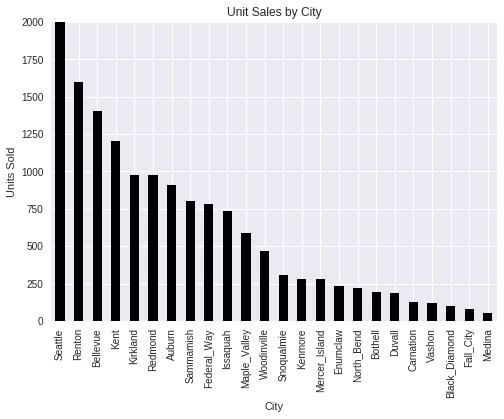

In [0]:
plt.figure(figsize=(18,18))
df[['city','id']].groupby('city').count().sort_values('id',ascending=False).plot(kind='bar', cmap='inferno',legend=False);
plt.ylim(0,2000)
plt.xlabel('City')
plt.ylabel('Units Sold')
plt.title('Unit Sales by City')

This chart shows the ranking of the most popular real estate locations outside of Seattle.

## Phase 5: Interpert

### Summary

* All models confirm that `yr_built`, `sqft_living` and `sqft_above` are the best predictors of `price` after being log transformed. For the categorical variables, `waterfront`, `condition` and `grade` are the most impactful on `price`.
* To improve this model it would be interesting to convert `yr_renovated` into a categorical variable (0 = no, 1 = yes), One Hot Encode it and re-run the Categorial Variable Model.